https://ai.plainenglish.io/how-to-find-outliers-and-anomalies-using-isolation-forest-388e5fec2762

In [47]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
scipy: 1.11.1
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 2.0.2
sklearn: 1.3.0
seaborn: 0.12.2


In [55]:
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/House-Prices/master/train.csv")
display(train)
train.columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

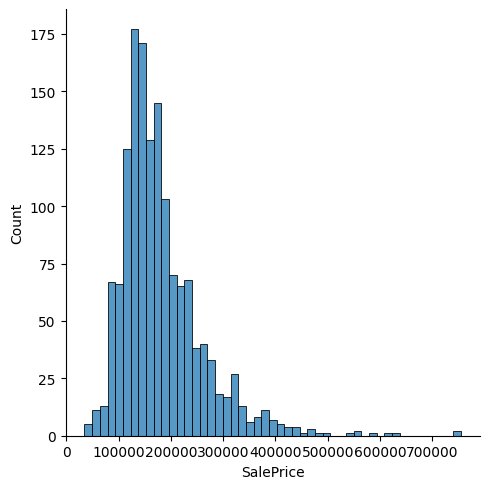

In [49]:
sns.displot(train['SalePrice'])

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


(-0.5, 9.5, 0.0, 800000.0)

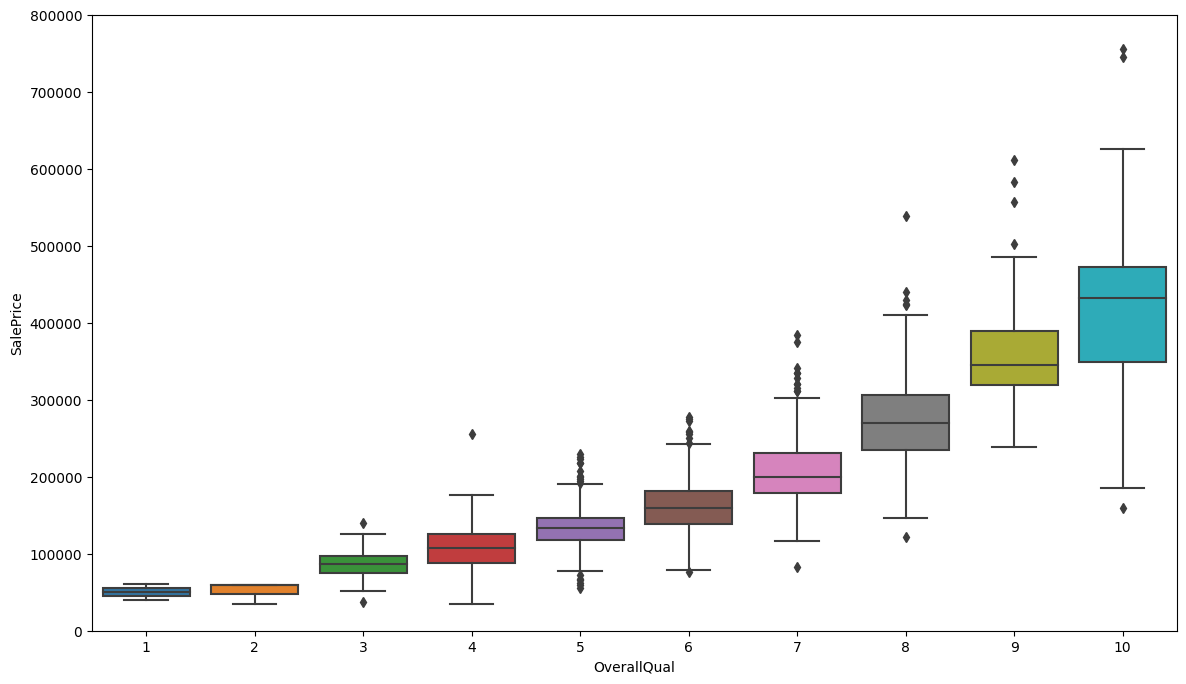

In [50]:
var='OverallQual'
data=pd.concat([train['SalePrice'],train[var]],axis=1)
display(data)
f,ax=plt.subplots(figsize=(14,8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800_000)

In [51]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total,"Percent'])
missing_data.head(20)

,"Total,""Percent"
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [52]:
train['MSZoning']=train['MSZoning'].fillna('Not Listed')
train['Alley']=train['Alley'].fillna('Not Listed')
train['Utilities']=train['Utilities'].fillna('Not Listed')
train['Exterior1st']=train['Exterior1st'].fillna('Not Listed')
train['Exterior2nd']=train['Exterior2nd'].fillna('Not Listed')
train['MasVnrType']=train['MasVnrType'].fillna('Not Listed')
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['Electrical']=train['Electrical'].fillna('Not Listed')
train['KitchenQual']=train['KitchenQual'].fillna('Not Listed')
train['FireplaceQu']=train['FireplaceQu'].fillna('Not Listed')
train['PoolQC']=train['PoolQC'].fillna('Not Listed')
train['MiscFeature']=train['MiscFeature'].fillna('Not Listed')
train['Fence']=train['Fence'].fillna('Not Listed')
train['Functional']=train['Functional'].fillna('Not Listed')
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
train['SaleType']=train['SaleType'].fillna('Not Listed')
train['GarageType']=train['GarageType'].fillna('Not Listed')
train['GarageFinish']=train['GarageFinish'].fillna('Not Listed')
train['GarageQual']=train['GarageQual'].fillna('Not Listed')
train['GarageCond']=train['GarageCond'].fillna('Not Listed')
train['BsmtFinSF1']=train['BsmtFinSF1'].fillna(train['BsmtFinSF2'].median())
train['BsmtFinSF2']=train['BsmtFinSF2'].fillna(train['BsmtFinSF1'].median())

# for these columns, NA=No Basement
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    train[col]=train[col].fillna('None')

# for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    train[col]=train[col].fillna(0)

#as there is no garage, NA value for this column is set to zero
for col in ('GarageArea','GarageCars','GarageYrBlt'):
    train[col]=train[col].fillna(0)

In [53]:
#Ordinal Encode columns that are objects
from sklearn import preprocessing 
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
train.MSZoning = enc.fit_transform(train.MSZoning. values . reshape(-1,1)) 
train.Street = enc.fit_transform(train.Street. values. reshape(-1,1)) 
train.Alley = enc.fit_transform(train.Alley.values.reshape(-1,1))
train.LotShape=enc.fit_transform(train.LotShape.values.reshape(-1,1))
train.LandContour=enc.fit_transform(train.LandContour.values.reshape(-1,1))
train.Utilities=enc.fit_transform(train.Utilities.values.reshape(-1,1))
train.LotConfig=enc.fit_transform(train.LotConfig.values.reshape(-1,1))
train.LandSlope=enc.fit_transform(train.LandSlope.values.reshape(-1,1))
train.Neighborhood=enc.fit_transform(train.Neighborhood.values.reshape(-1,1))
train.Condition1=enc.fit_transform(train.Condition1.values.reshape(-1,1))
train.Condition2=enc.fit_transform(train.Condition2.values.reshape(-1,1))
train.BldgType=enc.fit_transform(train.BldgType.values.reshape(-1,1))
train.HouseStyle=enc.fit_transform(train.HouseStyle.values.reshape(-1,1))
train.RoofStyle=enc.fit_transform(train.RoofStyle.values.reshape(-1,1))
train.RoofMatl=enc.fit_transform(train.RoofMatl.values.reshape(-1,1))
train.Exterior1st=enc.fit_transform(train.Exterior1st.values.reshape(-1,1))
train.Exterior2nd=enc.fit_transform(train.Exterior2nd.values.reshape(-1,1))
train.MasVnrType=enc.fit_transform(train.MasVnrType.values.reshape(-1,1))
train.ExterQual=enc.fit_transform(train.ExterQual.values.reshape(-1,1))
train.ExterCond=enc.fit_transform(train.ExterCond.values.reshape(-1,1))
train.Foundation=enc.fit_transform(train.Foundation.values.reshape(-1,1))
train.BsmtQual=enc.fit_transform(train.BsmtQual.values.reshape(-1,1))
train.BsmtCond=enc.fit_transform(train.BsmtCond.values.reshape(-1,1))
train.BsmtExposure=enc.fit_transform(train.BsmtExposure.values.reshape(-1,1))
train.BsmtFinType1=enc.fit_transform(train.BsmtFinType1.values.reshape(-1,1))
train.BsmtFinSF1=enc.fit_transform(train.BsmtFinSF1.values.reshape(-1,1))
train.BsmtFinType2=enc.fit_transform(train.BsmtFinType2.values.reshape(-1,1))
train.BsmtFinSF2=enc.fit_transform(train.BsmtFinSF2.values.reshape(-1,1))
train.Heating=enc.fit_transform(train.Heating.values.reshape(-1,1))
train.HeatingQC=enc.fit_transform(train.HeatingQC.values.reshape(-1,1))
train.CentralAir=enc.fit_transform(train.CentralAir.values.reshape(-1,1))
train.Electrical=enc.fit_transform(train.Electrical.values.reshape(-1,1))

In [59]:
y=train.SalePrice.values
X=train.drop(['SalePrice','Id','Alley','FireplaceQu','GarageType','PoolQC','MiscFeature','MSSubClass','LotFrontage','LotArea','Condition2','BldgType','BsmtFinType2',
              'Functional','Fence'],axis=1)
X.shape
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=1)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1314, 66), (146, 66), (1314,), (146,))

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

model=make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=0,n_estimators=400,max_depth=5,min_samples_split=-2, learning_rate=.1,loss='ls'))
model.fit(X_train,y_train)
print(model.score(X-train,y_train))

ValueError: could not convert string to float: 'RL'